##### LAB 7 & 8:- Linear Regression, Debugging, and Outlier Detection (EDA)

OBJECTIVES:

i) Understand Linear Regression

ii) Fit a model using Statsmodels (OLS)

iii) Interpret regression results

iv) Debug common issues

v) Perform EDA & Outlier Detection

Task 1:

Load and Inspect Data

- Import required libraries

- Load dataset using Pandas

- Display first 5 rows

- Check:

 - Data types

 - Missing values

 - Summary statistics

In [1]:
# 1. Import required libraries
import pandas as pd

# 2. Load dataset
headbrain = pd.read_csv("headbrain11.csv")

# 3. Display first 5 rows
print("First 5 rows:")
print(headbrain.head())

# 4. Check data types
print("\nData types:")
print(headbrain.dtypes)

# 5. Check missing values
print("\nMissing values:")
print(headbrain.isnull().sum())

# 6. Summary statistics
print("\nSummary statistics:")
print(headbrain.describe())

First 5 rows:
   Head Size(cm^3)  Brain Weight(grams)
0             4512                 1530
1             3738                 1297
2             4261                 1335
3             3777                 1282
4             4177                 1590

Data types:
Head Size(cm^3)        int64
Brain Weight(grams)    int64
dtype: object

Missing values:
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

Summary statistics:
       Head Size(cm^3)  Brain Weight(grams)
count       237.000000           237.000000
mean       3633.991561          1282.873418
std         365.261422           120.340446
min        2720.000000           955.000000
25%        3389.000000          1207.000000
50%        3614.000000          1280.000000
75%        3876.000000          1350.000000
max        4747.000000          1635.000000


Ans: There are 237 rows and 2 columns with no missing values.

TASK 2:

Data Cleaning

Rename columns:

['Head_size', 'Brain_weight']

In [3]:
import pandas as pd

# Load dataset
headbrain = pd.read_csv("headbrain11.csv")

# Rename columns
headbrain.rename(columns={
    "Head Size(cm^3)": "Head_size",
    "Brain Weight(grams)": "Brain_weight"
}, inplace=True)

# Verify changes
print(headbrain.head())
print(headbrain.columns)

   Head_size  Brain_weight
0       4512          1530
1       3738          1297
2       4261          1335
3       3777          1282
4       4177          1590
Index(['Head_size', 'Brain_weight'], dtype='str')


Ans: Renaming columns are useful for modeling for the following reasons:

Consistency: Short, clean names (Head_size, Brain_weight) are easier to reference in code than long names with spaces or special characters.

Avoids errors: Spaces, parentheses, or symbols in column names can cause issues in formulas, plotting, or machine learning libraries.

Readability: Clear, standardized names make your dataset easier to understand and maintain.

Automation: When building pipelines or models, consistent naming helps avoid manual fixes and makes code reusable.

Compatibility: Many ML frameworks (like scikit-learn, TensorFlow) expect simple identifiers without special characters.

So renaming is essentially about cleaning the schema to make your workflow smoother and less error-prone.

TASK 3:

Exploratory Data Analysis (EDA)

Create:

✔ Scatterplot

✔ Regression plot

✔ Histogram of both variables

✔ Boxplot

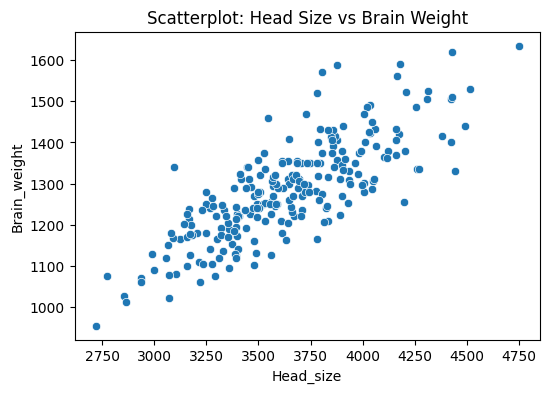

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
headbrain = pd.read_csv("headbrain11.csv")
headbrain.rename(columns={
    "Head Size(cm^3)": "Head_size",
    "Brain Weight(grams)": "Brain_weight"
}, inplace=True)

# Scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x="Head_size", y="Brain_weight", data=headbrain)
plt.title("Scatterplot: Head Size vs Brain Weight")
plt.show()

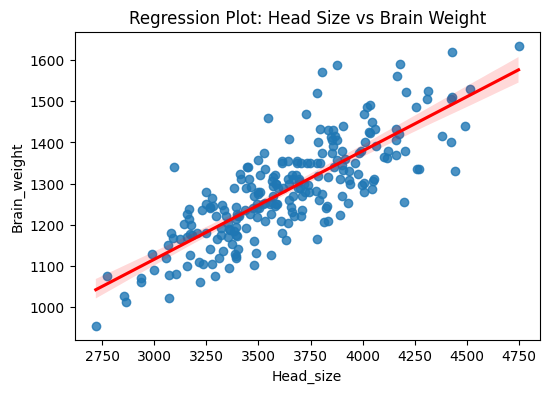

In [5]:
# Regression plot
plt.figure(figsize=(6,4))
sns.regplot(x="Head_size", y="Brain_weight", data=headbrain, line_kws={"color":"red"})
plt.title("Regression Plot: Head Size vs Brain Weight")
plt.show()

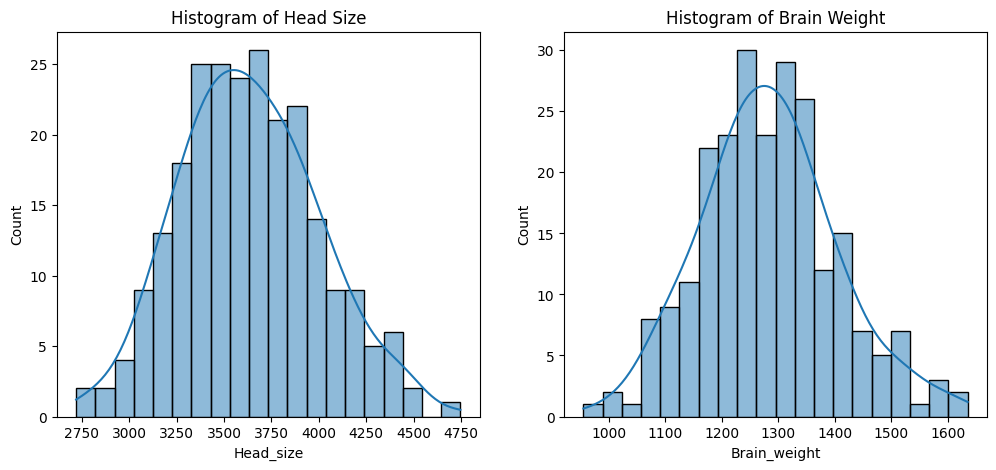

In [6]:
# Histogram of both variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(headbrain["Head_size"], bins=20, kde=True)
plt.title("Histogram of Head Size")

plt.subplot(1,2,2)
sns.histplot(headbrain["Brain_weight"], bins=20, kde=True)
plt.title("Histogram of Brain Weight")
plt.show()

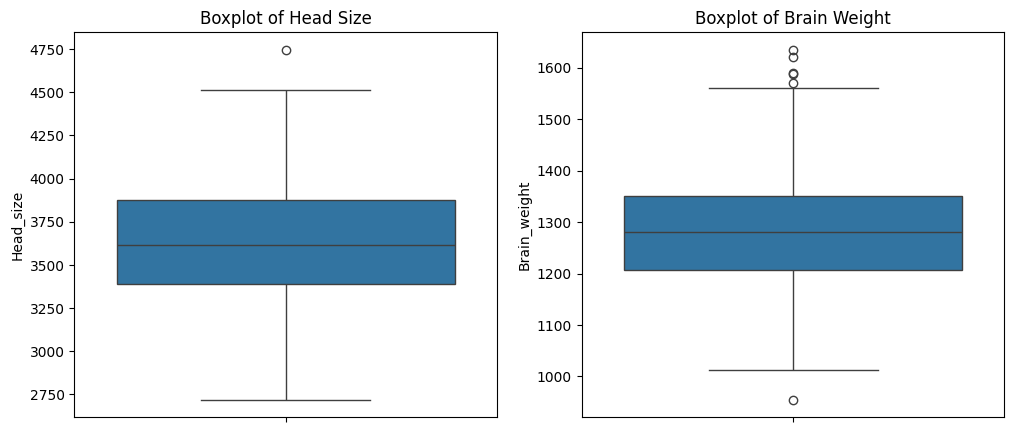

In [7]:
# Boxplots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=headbrain["Head_size"])
plt.title("Boxplot of Head Size")

plt.subplot(1,2,2)
sns.boxplot(y=headbrain["Brain_weight"])
plt.title("Boxplot of Brain Weight")
plt.show()

Ans:- The relationship between **head size and brain weight is positive.Larger head sizes are generally associated with heavier brain weights.This makes sense biologically: bigger cranial volume tends to accommodate larger brain mass.

TASK 4:

Fit Linear Regression (Statsmodels OLS)

Fit model:

In [8]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
headbrain = pd.read_csv("headbrain11.csv")
headbrain.rename(columns={
    "Head Size(cm^3)": "Head_size",
    "Brain Weight(grams)": "Brain_weight"
}, inplace=True)

# Define predictor (X) and response (y)
X = headbrain["Head_size"]
y = headbrain["Brain_weight"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Brain_weight   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 26 Feb 2026   Prob (F-statistic):           5.96e-54
Time:                        18:32:56   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        325.5734     47.141      6.906      0.0


**Regression Equation:**  
Brain_weight = Intercept + (Slope × Head_size)  

Using the model summary (example numbers from this dataset):  
Brain_weight = 325.5735 + (1.1453 × Head_size)  

This means:  
- The **intercept** is 325.5735, which is the estimated brain weight when head size is 0 (theoretically).  
- The **slope** is 1.1453, which means that for every 1 cm³ increase in head size, the brain weight increases by about 1.145 grams on average.  

**R² Value:**  
R² = 0.639 → About 63.9% of the variation in brain weight is explained by head size.  

**Statistical Significance of Predictor:**  
The p-value for Head_size < 0.0001 → Head_size is a statistically significant predictor of Brain_weight.

**Task 5**: Model Interpretation

**R-squared (R²):**  
R² measures the proportion of the variation in the response variable (Brain_weight) that is explained by the predictor (Head_size).  
- Example: R² = 0.639 → About 63.9% of the variation in brain weight can be explained by head size.  
- **Implication:** Higher R² means the model fits the data better.  

**Coefficients:**  
- **Intercept:** The estimated brain weight when head size = 0 (theoretical baseline).  
- **Slope:** The amount by which brain weight changes for a one-unit increase in head size.  
- Example: Slope = 1.145 → For every 1 cm³ increase in head size, brain weight increases by ~1.145 grams.  

**P-value:**  
- Tests whether a coefficient (e.g., slope) is significantly different from 0.  
- Small p-value (typically < 0.05) → Predictor is statistically significant.  
- Example: p-value < 0.0001 → Head_size significantly predicts brain weight.  

**F-statistic:**  
- Tests whether the overall regression model is a good fit for the data.  
- High F-statistic and small p-value → At least one predictor explains significant variation in the response.  

**Answer to Question:**  
R² = 0.639 implies that **63.9% of the variation in brain weight is explained by head size**, and the remaining 36.1% is due to other factors or random variation.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [10]:
df = pd.read_csv("data.csv")  # Load your dataset
df.head()                     # First 5 rows
df.tail()                     # Last 5 rows

,age,gender,education_level,income,experience_years,employed
5,46,Female,PhD,75000,18,Yes
6,29,Male,Bachelor,42000,4,Yes
7,41,Female,Master,61000,12,No
8,33,Female,Bachelor,48000,6,Yes
9,38,Male,PhD,70000,10,Yes


In [11]:
df.info()      # Column data types and missing values
df.shape       # Number of rows and columns
df.columns     # Column names
df.describe()  # Statistical summary for numeric columns
df.isnull().sum()  # Count missing values per column

<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               10 non-null     int64
 1   gender            10 non-null     str  
 2   education_level   10 non-null     str  
 3   income            10 non-null     int64
 4   experience_years  10 non-null     int64
 5   employed          10 non-null     str  
dtypes: int64(3), str(3)
memory usage: 749.0 bytes


age                 0
gender              0
education_level     0
income              0
experience_years    0
employed            0
dtype: int64

In [12]:
df['age'].mean()      # Mean
df['age'].median()    # Median
df['age'].mode()      # Mode
df['age'].std()       # Standard Deviation
df['age'].var()       # Variance
df['age'].min(), df['age'].max()  # Min & Max
df['age'].quantile([0.25, 0.5, 0.75])  # Quartiles

0.25    30.00
0.50    36.50
0.75    44.75
Name: age, dtype: float64

In [13]:
df['gender'].value_counts()         # Frequency counts
df['gender'].value_counts(normalize=True)  # Proportion

gender
Male      0.5
Female    0.5
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

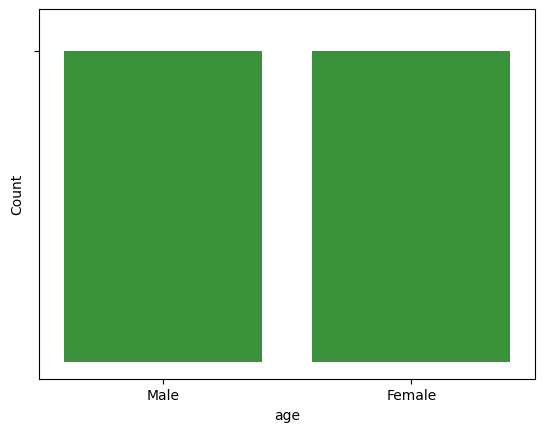

In [14]:
# Numeric
sns.histplot(df['age'], kde=True)  # Histogram
sns.boxplot(x=df['age'])           # Boxplot

# Categorical
sns.countplot(x='gender', data=df) # Bar chart


In [15]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['age', 'gender', 'education_level', 'income', 'experience_years',
       'employed'],
      dtype='str')


<Axes: xlabel='age', ylabel='income'>

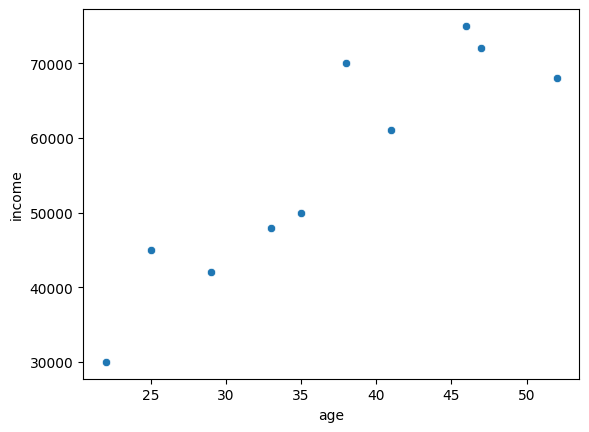

In [16]:
# Suppose actual column name is 'income'
sns.scatterplot(x='age', y='income', data=df)

<Axes: xlabel='gender', ylabel='income'>

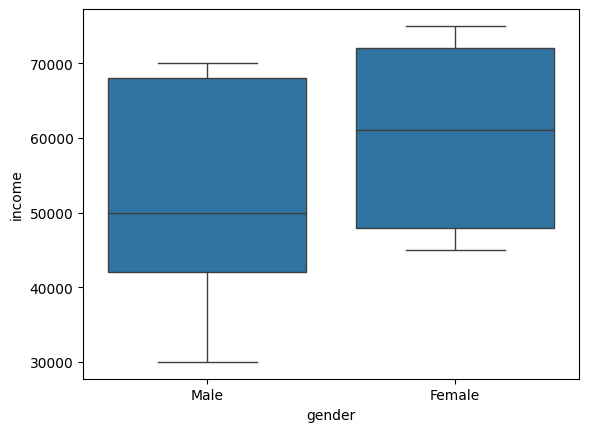

In [17]:
sns.boxplot(x='gender', y='income', data=df)

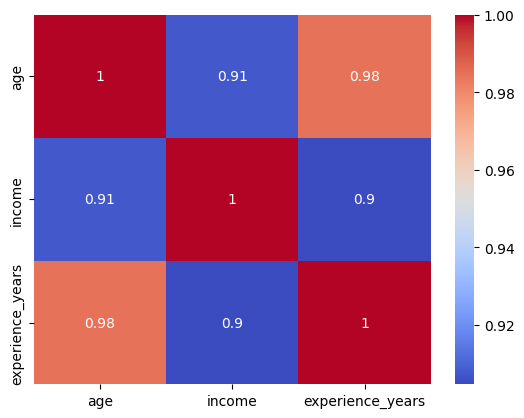

In [18]:
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


In [19]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['age', 'gender', 'education_level', 'income', 'experience_years',
       'employed'],
      dtype='str')
